In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [3]:
# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

NuSVC(gamma='auto')

In [4]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

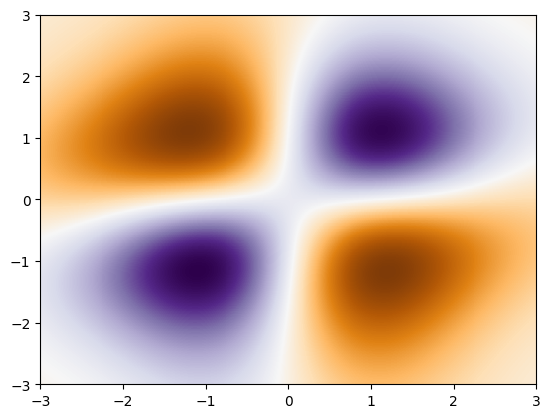

In [5]:
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)

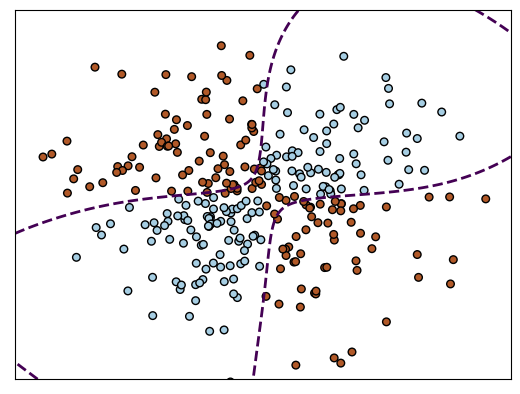

In [6]:
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the SVM model on the training set
clf = svm.NuSVC(gamma="auto")
clf.fit(X_train, y_train)

# Evaluate the accuracy on the testing set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy*100)

Accuracy: 86.66666666666667
